In [1]:
# Exploring our data and visualization
# Train and create a linear regression model
# Evaluate our model
# Make prediction
# Caluclate RMSE
# What if we consider more or less features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
house = pd.read_csv("data.csv")

In [4]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
house.tail()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [7]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
house.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Text(0.5, 0, ' number of bedrooms')

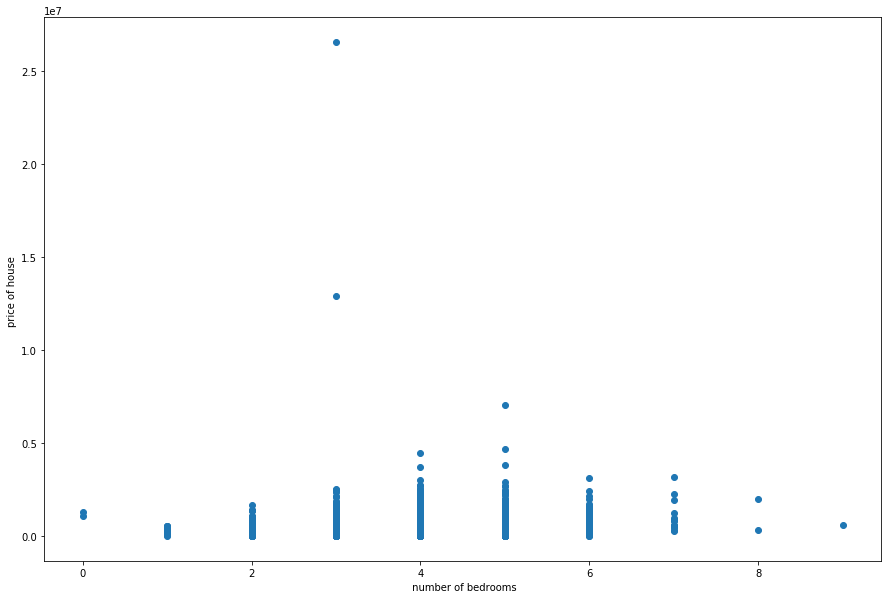

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(house.bedrooms, house.price)
plt.ylabel("price of house ")
plt.xlabel(" number of bedrooms") 

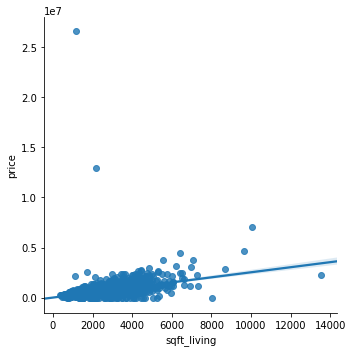

In [11]:
sns.lmplot("sqft_living","price", data=house)

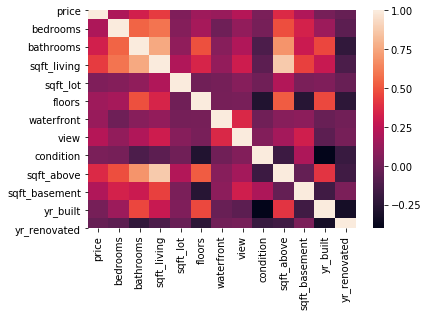

In [12]:
sns.heatmap(house.corr())

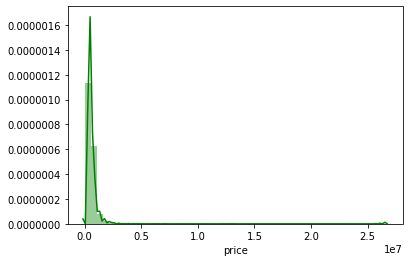

In [13]:
sns.distplot(house["price"],color="green")

<Figure size 720x432 with 0 Axes>

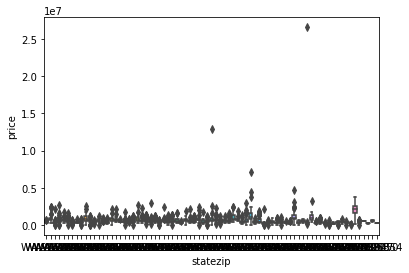

<Figure size 720x432 with 0 Axes>

In [14]:
sns.boxplot(x="statezip", y="price",data=house)
plt.figure(figsize=(10,6))


# Training Model

In [15]:
X= house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement']]
y = house['price']

In [16]:
X.shape

(4600, 10)

In [17]:
y.shape

(4600,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# training, testing 75% training 25% test by default

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [21]:
print (X_train.shape,y_train.shape)

(3220, 10) (3220,)


In [22]:
print(X_test.shape,y_test.shape)

(1380, 10) (1380,)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
prediction = model.predict(X_test)

In [27]:
prediction

array([287720.80317548, 568502.5040321 , 246615.24971375, ...,
       412525.7966831 , 595858.24754467, 404821.846199  ])

# LET"S DO EVALUATION

In [28]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [29]:
house1 = house[house['price']== 2384000.0]

In [30]:
house1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [31]:

house1['price']

1    2384000.0
Name: price, dtype: float64

In [32]:

prediction[1]

568502.5040320999

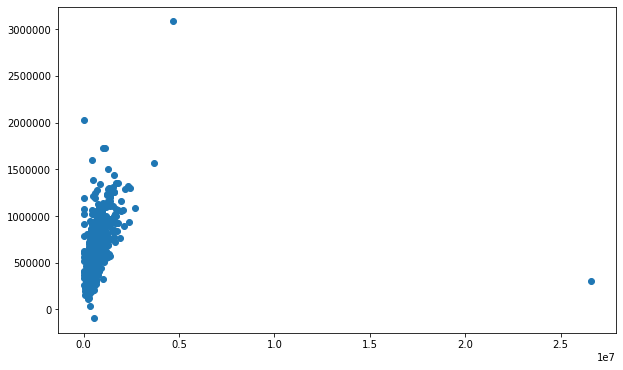

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,prediction)

In [34]:
X.shape

(4600, 10)

In [35]:
model.coef_

array([-5.61855418e+04, -1.33495614e+04,  1.86372382e+02, -7.97338923e-01,
        3.25828191e+04,  4.47730955e+05,  5.06358351e+04,  5.31716350e+04,
        9.80521071e+01,  8.83202749e+01])

In [36]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient Values'])

,Coefficient Values
bedrooms,-56185.541766
bathrooms,-13349.561416
sqft_living,186.372382
sqft_lot,-0.797339
floors,32582.819121
waterfront,447730.954562
view,50635.835079
condition,53171.634994
sqft_above,98.052107
sqft_basement,88.320275


In [37]:
model.intercept_


-72939.05795990769

#RMSE(Root Mean Square Error can be use to Evaluate Linear Regression)

In [38]:
from sklearn import metrics

In [39]:
mean_sq_err = metrics.mean_squared_error(y_test,prediction)

In [40]:
RMSE = np.sqrt(mean_sq_err)

In [41]:
RMSE

751561.2853352331

In [42]:
X= house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors','sqft_basement']]
y = house['price']

#Comparing Models By Features

In [43]:
X.shape

(4600, 6)

In [44]:
y.shape


(4600,)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [46]:
model2 = LinearRegression()

In [47]:
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
prediction2 = model2.predict(X_test)

In [49]:
prediction2

array([311868.81024148, 610160.28435429, 272848.06248207, ...,
       374443.59857957, 617172.53358149, 377387.63924857])

In [50]:
prediction2[1]

610160.2843542909

In [51]:
house1['price']

1    2384000.0
Name: price, dtype: float64

In [57]:
mean_sq_err2 = metrics.mean_squared_error(y_test,prediction2)

In [60]:
RMSE2 = np.sqrt(mean_sq_err2)

In [61]:
RMSE2

753742.9850980035